# ML Model For MQT135 Sensor Data

#### Featurs : 'Serial Number', 'MQ135', 'Gas'
#### Model Used : RandomForestClassifier

In [15]:
##Require Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [16]:
#reading Dataset
df = pd.read_csv("Gas_Sensors_Measurements.csv")

###  1) EDA (Exploratory Data Analysis)

In [17]:
#Display the first 5 record
df.head()

,Serial Number,MQ135,Gas
0,0,416,NoGas
1,1,416,NoGas
2,2,416,NoGas
3,3,416,NoGas
4,4,416,NoGas


In [18]:
#Display the last 5 record
df.tail()

,Serial Number,MQ135,Gas
6395,1595,436,Mixture
6396,1596,431,Mixture
6397,1597,429,Mixture
6398,1598,430,Mixture
6399,1599,434,Mixture


In [19]:
df.columns

Index(['Serial Number', 'MQ135', 'Gas'], dtype='object')

In [20]:
#display the totle number of record,mean,std,min etc.
df.describe()

,Serial Number,MQ135
count,6400.000000,6400.000000
mean,799.500000,416.727031
std,461.916214,76.681407
min,0.000000,275.000000
25%,399.750000,354.000000
50%,799.500000,437.000000
75%,1199.250000,473.000000
max,1599.000000,589.000000


In [21]:
#shape of dataset
df.shape

(6400, 3)

In [22]:
#lets see the size of overall dataset
df.size

19200

In [23]:
#lets see the dtypes of each feature
df.dtypes

Serial Number     int64
MQ135             int64
Gas              object
dtype: object

In [24]:
#check the whethe feature had null values or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Serial Number  6400 non-null   int64 
 1   MQ135          6400 non-null   int64 
 2   Gas            6400 non-null   object
dtypes: int64(2), object(1)
memory usage: 150.1+ KB


In [25]:
#now see the totale count of null values
df.isnull().sum()

Serial Number    0
MQ135            0
Gas              0
dtype: int64

### 1.2) Data Vusialization and Analysis 

<Axes: >

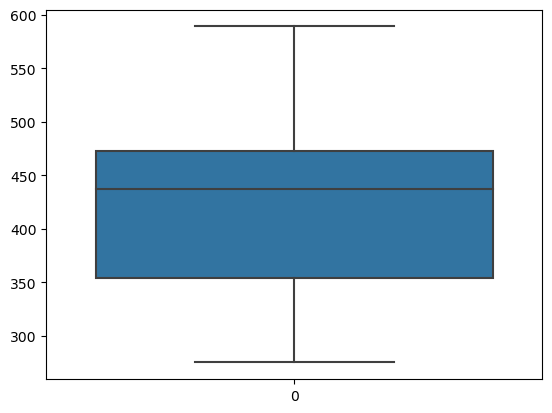

In [26]:
#Now lets check whether data has any outlier
#boxplot for temp
sns.boxplot(df['MQ135'])
#Their is no outlier in temp column/feature

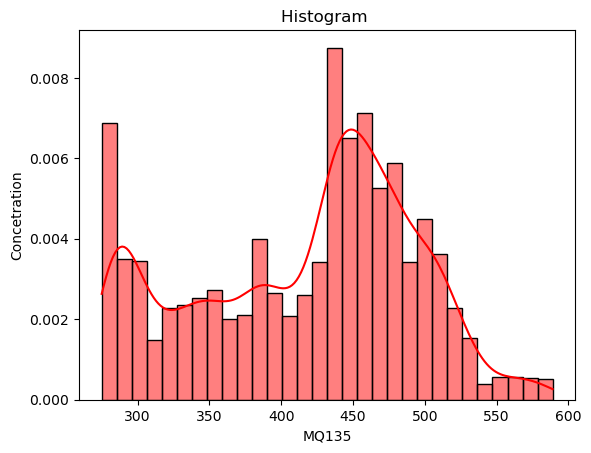

In [38]:
#now check whether data is normaly distributed or not
sns.histplot(df['MQ135'], kde=True, color='red', bins=30, stat='density')

# Add labels and title
plt.xlabel('MQ135')
plt.ylabel('Concetration')
plt.title('Histogram ')

# Show the plot
plt.show()
#on the basis of the visualisation we conclude that that is normaly distributed 
#beacuse maximum data is near to the mean and also it not any outlier.

D:\anacondaa4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


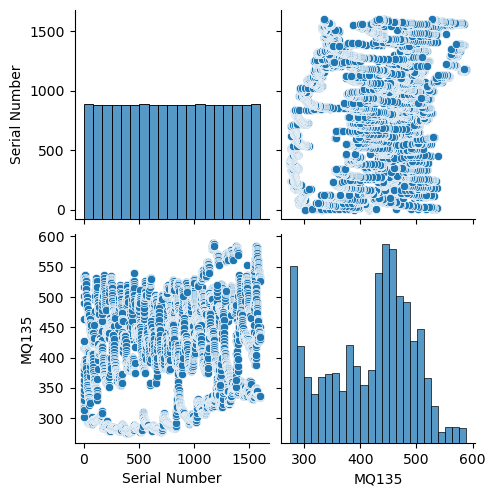

In [28]:
# Visualize the distribution of numerical features
sns.pairplot(df)
plt.show()

In [29]:
#Here we get values count of column MQ135
df['MQ135'].value_counts()

MQ135
284    89
280    71
442    69
439    64
283    62
       ..
552     1
541     1
547     1
548     1
573     1
Name: count, Length: 314, dtype: int64

In [30]:
#Here we get values count of column GAS
df['Gas'].value_counts()

Gas
NoGas      1600
Perfume    1600
Smoke      1600
Mixture    1600
Name: count, dtype: int64

### 2) Model Building

In [31]:
# Assuming 'concentration' is the feature column and 'gas' is the target column
X = df[['MQ135']]  # Features
y = df['Gas']              # Target variable


In [32]:
#split the data in training and tesing one
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
from sklearn.ensemble import RandomForestClassifier
#Apply the model on split data

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [39]:
#check Whethe model is predict accurate or not
y_pred = model.predict(X_test)

In [40]:
y_pred

array(['NoGas', 'Perfume', 'Smoke', ..., 'NoGas', 'NoGas', 'Perfume'],
      dtype=object)

###  3) Accuracy

In [35]:
#Check the accuracy of our model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7


### 4) Model Testing

In [36]:
# Assuming you already have a trained model stored in a variable named 'model'
# Take input from the user
concentration_input = float(input("Enter the concentration value: "))

# Reshape the input for prediction
concentration_input = [[concentration_input]]

# Make prediction using the trained model
predicted_gas = model.predict(concentration_input)[0]

print("Predicted gas type:", predicted_gas)


Enter the concentration value: 700
Predicted gas type: Perfume


D:\anacondaa4\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
